# Homework 3: SVMs and Feature Selection
### Due Tuesday Feb 12 5 PM

In this assignment, we use the UCI spam email database (https://archive.ics.uci.edu/ml/datasets/Spambase) and analyse it using SVMs. As Python is our language of choice, we will be using the "scikit-learn" package which includes SVM functionality. 

Referencing:
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array
https://stackoverflow.com/questions/6710684/remove-one-column-for-a-numpy-array

## Experiment 1: Linear SVM


In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
#Load Data
spamdata = pd.read_csv("spambase.data", header = None)

spamdata.head()
spam = spamdata.values #to numpy matrix
print(spam.shape)
print(spam[0,:])

#split data from labels
data = spam[:,:-1] 
label = spam[:,-1]

print(data.shape)
print(label.shape)
print(sum(label)) #1813 / 4601 spam labels

(4601, 58)
[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]
(4601, 57)
(4601,)
1813.0


In [3]:
# ******PREPROCESSING **********************************
#Split training/test data
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.50, stratify = label) 
print(X_train.shape)
print(sum(y_train)) #approx half of 1813 for equal split
print(X_train[0,:])
print(X_test[0,:])

#Scale data by training set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[0,:])
print(X_test_scaled[0,:])

(2300, 57)
906.0
[ 0.     0.     1.33   0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     1.33   0.     0.
  0.     0.     0.     0.     2.66   1.33   0.     1.33   0.     1.33
  1.33   0.     0.     0.     1.33   1.33   0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.288
  0.     0.144  0.     0.     1.857 10.    39.   ]
[1.900e-01 1.900e-01 1.900e-01 0.000e+00 1.080e+00 1.900e-01 1.900e-01
 9.800e-01 8.900e-01 5.900e-01 9.000e-02 1.080e+00 1.900e-01 8.900e-01
 9.000e-02 0.000e+00 0.000e+00 1.180e+00 3.850e+00 5.900e-01 1.780e+00
 0.000e+00 9.000e-02 2.900e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.000e-02
 0.000e+00 0.000e+00 0.000e+00 9.000e-02 9.000e-02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.900e-01 4.120e-01 2.220e-01 1.500e-02 4.195e+00 4.900e+01
 8.140e+02]
[-0.352

In [4]:
#*** TRAINING ******************************
 
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_scaled, y_train)

y_pred = svclassifier.predict(X_test_scaled)

In [5]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[1339   55]
 [  95  812]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1394
         1.0       0.94      0.90      0.92       907

   micro avg       0.93      0.93      0.93      2301
   macro avg       0.94      0.93      0.93      2301
weighted avg       0.93      0.93      0.93      2301



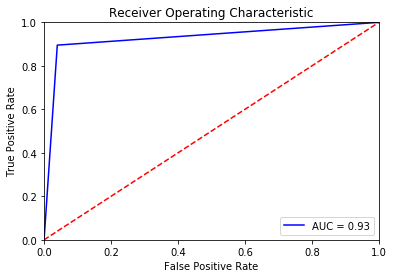

In [9]:
# ROC Plot
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Experiment 2: Feature Selection

Using the learned model from experiment 1, we then select the m features (2...57) with the highest |w_m| values, and train a linear SVM with only the selected features.

https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.argsort.html

In [24]:
svclassifier.coef_.shape
print(svclassifier.coef_)
w_orig = np.absolute(svclassifier.coef_)
w_argsort = np.argsort(w_orig) #max first
w_argsort = w_argsort[0][::-1]
print(w_argsort)

[[-1.93734168e-01 -9.25573853e-05 -3.44608755e-02  1.97427031e-01
   3.01683944e-01  1.37713570e-01  6.13841935e-01  1.51595862e-01
   2.46354768e-01  3.56116650e-02 -8.25937099e-03 -1.28834028e-01
   6.23880783e-03 -6.41118439e-03  9.04719054e-02  5.30356001e-01
   5.84192764e-01  1.00226660e-01  2.08099620e-02  4.44692403e-01
   2.07670832e-01  7.95231937e-02  4.96068944e-01  2.83729399e-01
  -2.35778807e+00 -5.73431203e-01 -3.57509777e+00  1.30680710e-01
  -3.63425969e-01 -1.94363108e-01 -1.15456526e+00 -4.60502746e-01
  -1.79968495e-01  2.16516354e-01 -7.65390766e-01  1.88319095e-01
  -8.24328310e-03 -6.58312567e-02 -1.84969992e-01 -1.06594249e-01
  -5.51973998e-01 -7.42139004e-01 -5.02579341e-02 -8.45322253e-01
  -4.81096729e-01 -1.04035241e+00 -5.83796843e-02 -6.06553164e-01
  -9.94884529e-02 -3.37942127e-02 -4.88224749e-02  4.05643555e-01
   8.95611339e-01  3.83065678e-01  1.46965953e+00  6.86982078e-01
   1.47022888e-01]]
[26 24 54 30 45 52 43 34 41 55  6 47 16 25 40 15 22 44 3